Dylan Hastings

# 1. Autocorrelation

'babies.zip` contains baby name frequencies per year (one file per year). You can treat each baby name as a time series.

1. Get the autocorrelation and partial autocorrelation for the names `Olivia`, `Newton` and `John`.


In [2]:
import glob
import numpy as np
import pandas as pd
import zipfile
import os
from os import listdir
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
files = listdir('data/babies')

In [4]:
x = []
x_line = []

for file in files:
    with open(f'data/babies/{file}') as opened_file:
        for line in opened_file:
            x_line = []
            x_line = (line.rstrip().split(','))
            x_line.append(file)
            x.append(x_line)

In [5]:
df = pd.DataFrame(columns = ['name', 'sex', 'number', 'year'], data = x)

In [6]:
df.year = df.year.apply(lambda x: x.replace('.txt', '').replace('yob', ''))

In [7]:
df.year = pd.to_datetime(df['year'], format='%Y')

In [8]:
df = df.set_index('year')

In [9]:
df.head()

,name,sex,number
year,,,
1880-01-01,Mary,F,7065
1880-01-01,Anna,F,2604
1880-01-01,Emma,F,2003
1880-01-01,Elizabeth,F,1939
1880-01-01,Minnie,F,1746


In [10]:
df.number = df.number.astype(int)

In [11]:
df_Olivia = df[df.name == 'Olivia']
df_Newton = df[df.name == 'Newton']
df_John = df[df.name == 'John']

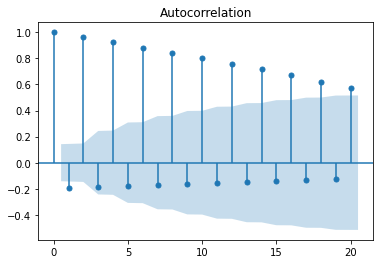

In [12]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_Olivia.number, lags=20);

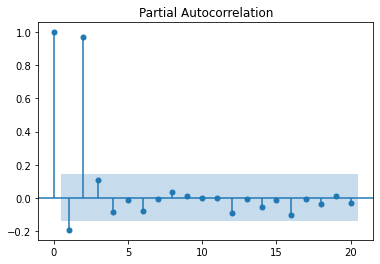

In [13]:
plot_pacf(df_Olivia.number, lags=20);

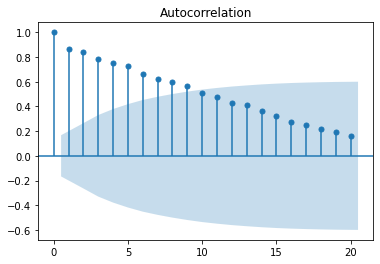

In [14]:
plot_acf(df_Newton.number, lags=20);

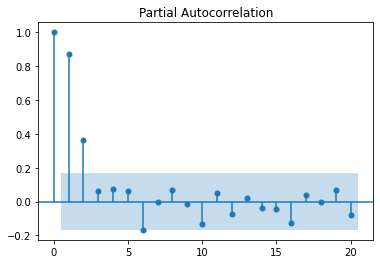

In [15]:
plot_pacf(df_Newton.number, lags=20);

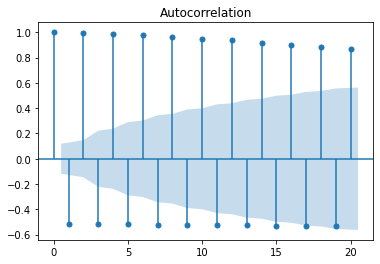

In [16]:
plot_acf(df_John.number, lags=20);

C:\Users\plick\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


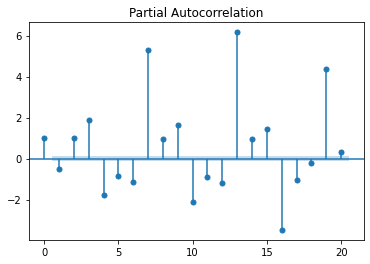

In [17]:
plot_pacf(df_John.number, lags=20);

2. Which name do you expect to be the most popular in 2022? Use an ARIMA model and backtesting to pick 3 interesting candidates. Support your findings with a plot

In [18]:
ts = df.groupby(['name'])['number'].sum().sort_values(ascending=False)
ts[:3]

name
James     5159306
John      5127501
Robert    4829274
Name: number, dtype: int32

In [19]:
df_James = df[df.name == 'James']
df_Robert = df[df.name == 'Robert']

In [20]:
df_James['year'] = df_James.index
df_John['year'] = df_John.index
df_Robert['year'] = df_Robert.index

<ipython-input-20-39b2a725cb8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_James['year'] = df_James.index
<ipython-input-20-39b2a725cb8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_John['year'] = df_John.index
<ipython-input-20-39b2a725cb8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [21]:
df_James.reset_index(inplace=True, drop=True)
df_John.reset_index(inplace=True, drop=True)
df_Robert.reset_index(inplace=True, drop=True)

In [22]:
df_James = df_James.groupby(['year', 'name'], as_index=False).sum()
df_John = df_John.groupby(['year', 'name'], as_index=False).sum()
df_Robert = df_Robert.groupby(['year', 'name'], as_index=False).sum()

In [23]:
df_James = df_James.drop(['name'], axis=1)
df_John = df_John.drop(['name'], axis=1)
df_Robert = df_Robert.drop(['name'], axis=1)

In [24]:
df_James = df_James.set_index('year')
df_John = df_John.set_index('year')
df_Robert = df_Robert.set_index('year')

In [25]:
from statsmodels.tsa.arima_model import ARIMA
df_train_James = df_James.iloc[:-40]
df_test_James = df_James.iloc[-40:]
df_train_John = df_John.iloc[:-40]
df_test_John = df_John.iloc[-40:]
df_train_Robert = df_Robert.iloc[:-40]
df_test_Robert = df_Robert.iloc[-40:]

C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

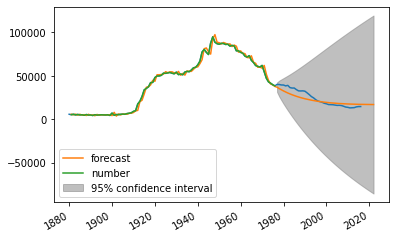

In [26]:
model = ARIMA(df_train_James, order=(2, 1, 2))  
res = model.fit()  
fig, ax = plt.subplots()
ax.plot(df_James)
res.plot_predict('1881', '2022', ax=ax);

C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

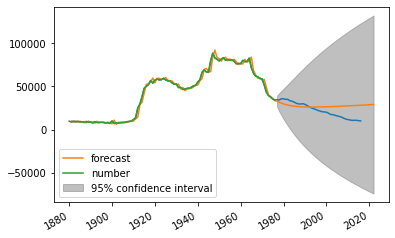

In [27]:
model = ARIMA(df_train_John, order=(2, 1, 2))  
res = model.fit()  
fig, ax = plt.subplots()
ax.plot(df_John)
res.plot_predict('1881', '2022', ax=ax);

C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JA

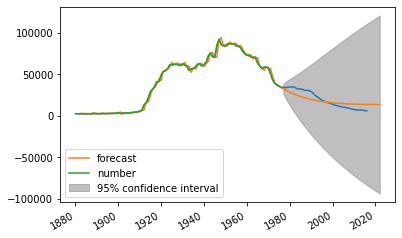

In [28]:
model = ARIMA(df_train_Robert, order=(2, 1, 2))  
res = model.fit()  
fig, ax = plt.subplots()
ax.plot(df_Robert)
res.plot_predict('1881', '2022', ax=ax);

Based on the above plots, I expect John to be the most popular name in 2022. 

# 2. Counterfactual prediction testing

The [FRED](https://fred.stlouisfed.org) database has economic data useful for this question.

A common method to test the effect of a one-off event is to fit an ARIMA model up to the event, and compare the forecast to the actual data of what happened, then measure the gap between the forecast and the event data.

1. Use GDP and unemployment data with the Counterfactual prediction testing methodology to get an estimate of the magnitude of COVID (around March 2020 as a cutoff date) on these two statistics. Use an ARIMA model which fits best to the pre-COVID time series and compare the output of both. Provide a visualization.


In [29]:
gdp = pd.read_csv('data/GDP.csv')

In [30]:
unrate = pd.read_csv('data/UNRATE.csv')

In [31]:
gdp.DATE = gdp.DATE.apply(lambda x: x.replace('-', ''))
unrate.DATE = unrate.DATE.apply(lambda x: x.replace('-', ''))

In [32]:
gdp.DATE = pd.to_datetime(gdp['DATE'], format='%Y%m%d')
unrate.DATE = pd.to_datetime(unrate['DATE'], format='%Y%m%d')
gdp = gdp.set_index('DATE')
unrate = unrate.set_index('DATE')

In [33]:
gdp_log = np.log(gdp)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(gdp_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [35]:
gdp_log_decompose = residual
gdp_log_decompose.dropna(inplace=True)

In [36]:
gdp_train = gdp_log_decompose.iloc[:-2]
gdp_test = gdp_log_decompose.iloc[-2:]
unrate_train = unrate.iloc[:-11]
unrate_test = unrate.iloc[-11:]

In [37]:
gdp_train.tail(3)

DATE
2019-04-01    0.001150
2019-07-01    0.001851
2019-10-01    0.020478
Name: resid, dtype: float64

In [38]:
unrate_train.tail(3)

,UNRATE
DATE,
2020-02-01,3.5
2020-03-01,4.4
2020-04-01,14.8


C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OC

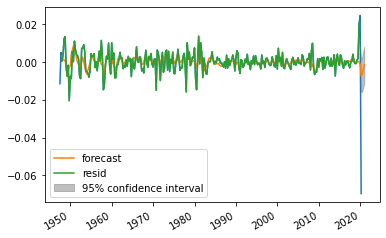

In [39]:
model = ARIMA(gdp_train, order=(2, 0, 1))  
res = model.fit()  
fig, ax = plt.subplots()
ax.plot(gdp_log_decompose)
res.plot_predict('1948', '2021', ax=ax);

C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\plick\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

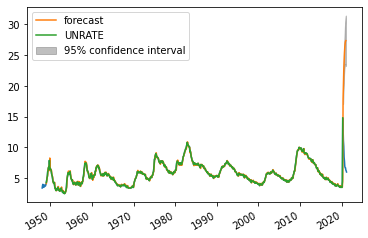

In [40]:
model = ARIMA(unrate_train, order=(2, 0, 1))  
res = model.fit()  
fig, ax = plt.subplots()
ax.plot(unrate)
res.plot_predict('1949', '2021', ax=ax);

2. Is GDP a unit root process or trend stationary? Use the 2008 and 2020 GDP shocks and statistical tests we've seen in class to provide an argument (it's possible event one says one thing and the other event says the opposite).

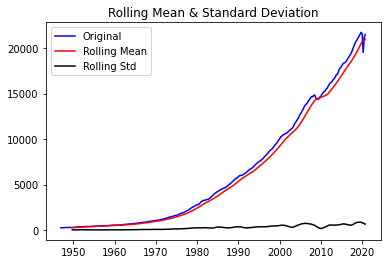

Results of Dickey-Fuller Test:


Test Statistic                   3.570367
p-value                          1.000000
#Lags Used                       3.000000
Number of Observations Used    292.000000
Critical Value (1%)             -3.452945
Critical Value (5%)             -2.871490
Critical Value (10%)            -2.572071
dtype: float64

In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(gdp)

Therefore, GDP is not stationary, but rather a unit root process.